In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[to_drop], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)

In [7]:
df.sample(10)

,Target,Text
1439,ham,In fact when do you leave? I think addie goes ...
2452,ham,Okay. I've seen it. So i should pick it on fri...
4394,ham,"Only just got this message, not ignoring you. ..."
376,ham,You could have seen me..i did't recognise you ...
1375,ham,We're finally ready fyi
5046,ham,Hmmm.still we dont have opener?
934,spam,Dear Matthew please call 09063440451 from a la...
1792,spam,WIN: We have a winner! Mr. T. Foley won an iPo...
552,ham,"Sure, if I get an acknowledgement from you tha..."
199,ham,"Found it, ENC &lt;#&gt; , where you at?"


In [8]:
df.describe(include='all')

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Data Cleaning

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

In [13]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
df.nunique().sum()

5171

In [15]:
df.groupby('Target').describe()

Text                                                               
       count unique                                                top freq
Target                                                                     
ham     4516   4516  Go until jurong point, crazy.. Available only ...    1
spam     653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [16]:
df.head()


,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


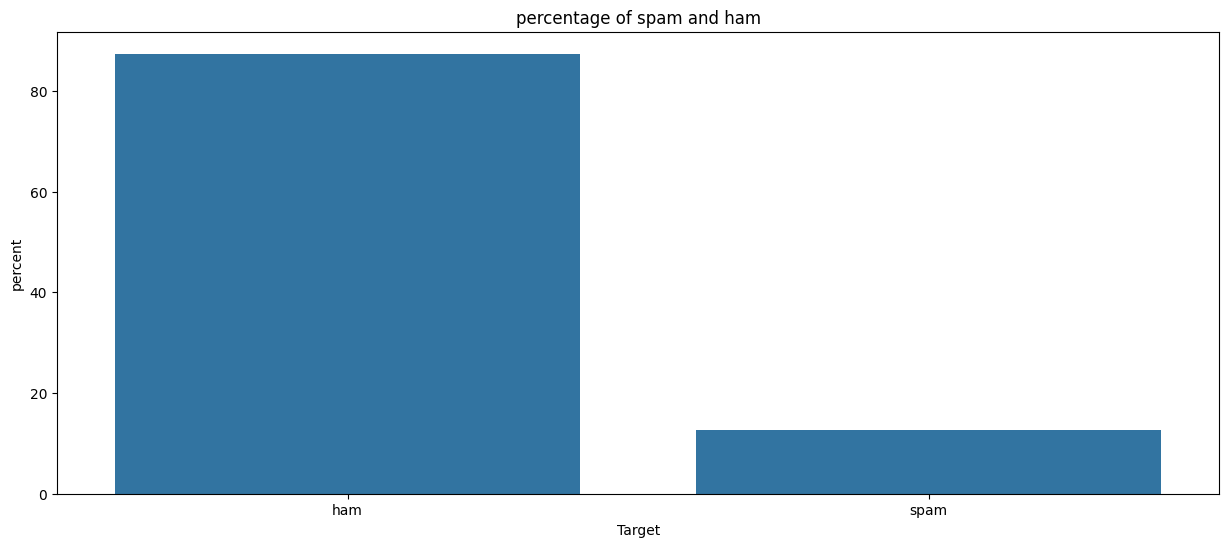

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x= "Target",data=df,stat='percent')
plt.title('percentage of spam and ham')
plt.show()

In [18]:
import re
import nltk
nltk.download('punkt')
df["No_of_Characters"] = df["Text"].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

[nltk_data] Downloading package punkt to C:\Users\win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df.head()

,Target,Text,No_of_Characters,No_of_Words,No_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


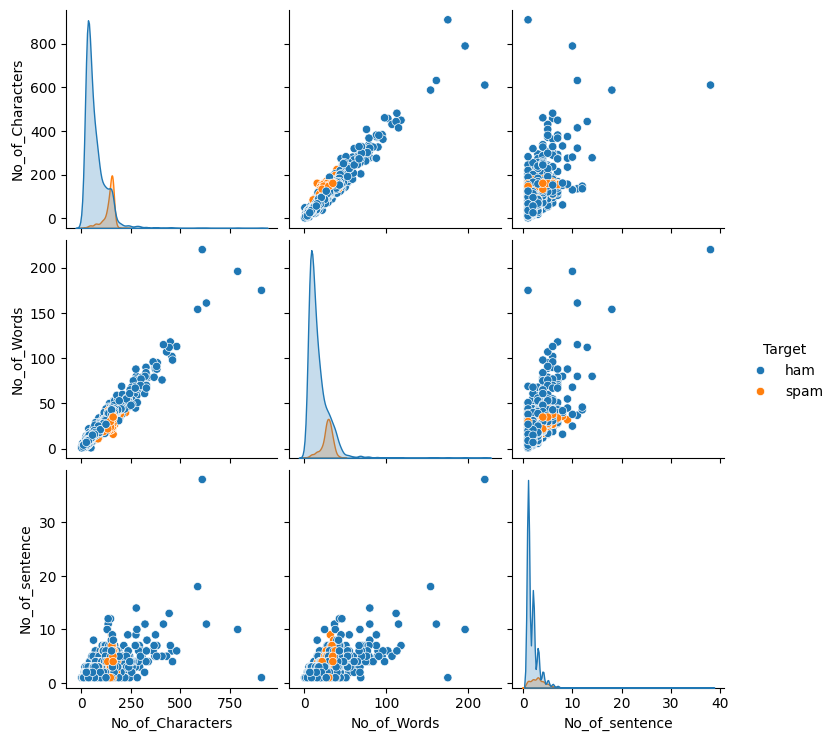

In [20]:
sns.pairplot(data=df,hue='Target')
plt.show()

<Axes: xlabel='No_of_Characters'>

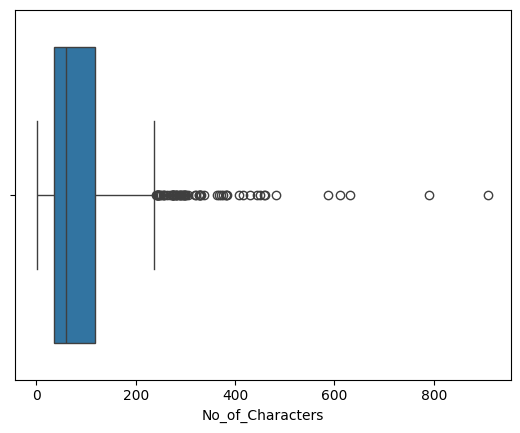

In [21]:
sns.boxplot(x="No_of_Characters",data=df)

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
lowage,uppage=remove_outlier(df['No_of_Characters'])
df['No_of_Characters']=np.where(df['No_of_Characters']>uppage,uppage,df['No_of_Characters'])
df['No_of_Characters']=np.where(df['No_of_Characters']<lowage,lowage,df['No_of_Characters'])

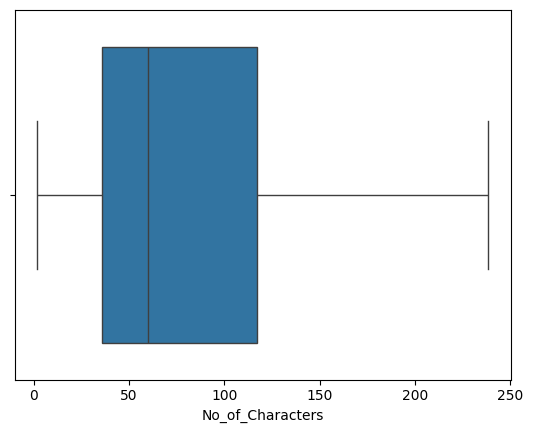

In [24]:
sns.boxplot(x="No_of_Characters",data=df)
plt.show()

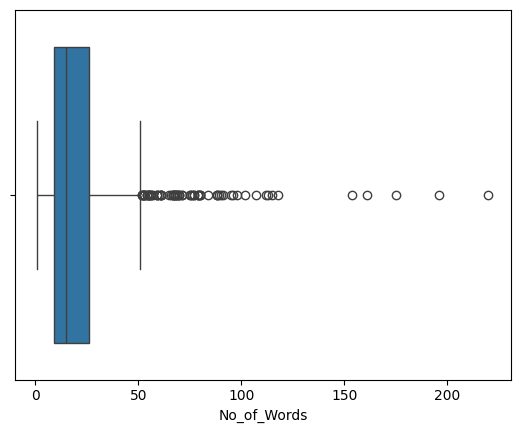

In [25]:
sns.boxplot(x="No_of_Words",data=df)
plt.show()

In [26]:
lowage,uppage=remove_outlier(df['No_of_Words'])
df['No_of_Words']=np.where(df['No_of_Words']>uppage,uppage,df['No_of_Words'])
df['No_of_Words']=np.where(df['No_of_Words']<lowage,lowage,df['No_of_Words'])

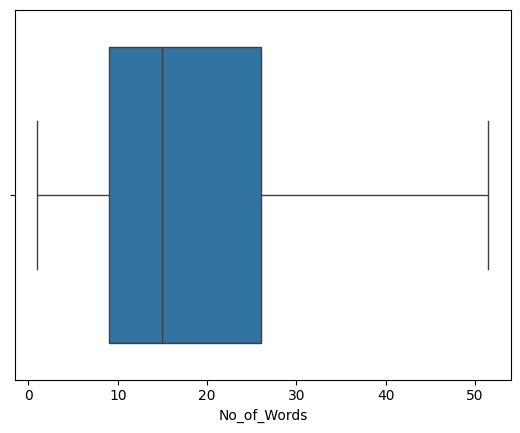

In [27]:
sns.boxplot(x="No_of_Words",data=df)
plt.show()

In [28]:
df.shape

(5169, 5)

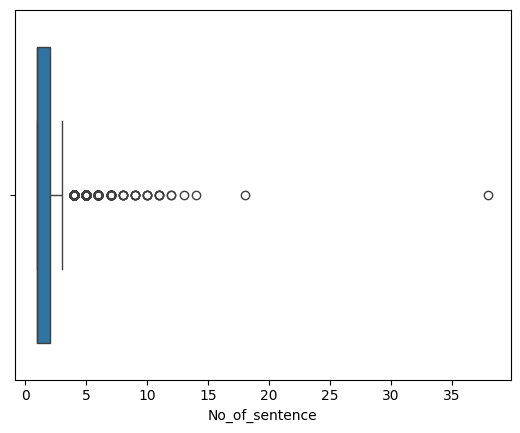

In [29]:
sns.boxplot(x="No_of_sentence",data=df)
plt.show()

In [30]:
lowage,uppage=remove_outlier(df['No_of_sentence'])
df['No_of_sentence']=np.where(df['No_of_sentence']>uppage,uppage,df['No_of_sentence'])
df['No_of_sentence']=np.where(df['No_of_sentence']<lowage,lowage,df['No_of_sentence'])

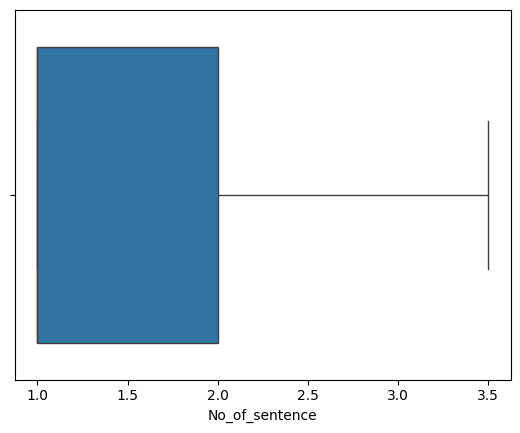

In [31]:
sns.boxplot(x="No_of_sentence",data=df)
plt.show()

In [32]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
text_feat = df['Text'].copy()

In [34]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [35]:
text_feat = text_feat.apply(text_process)

In [36]:
vectorizer = TfidfVectorizer()

In [37]:
features = vectorizer.fit_transform(text_feat)

In [38]:
features

<5169x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 43208 stored elements in Compressed Sparse Row format>

In [39]:
y=df['Target']

In [40]:
x=features

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=111)

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [45]:
nb=MultinomialNB()

In [47]:
kn=KNeighborsClassifier()

In [49]:
X_train=x_train.toarray()

In [50]:
nb.fit(X_train,y_train)

MultinomialNB()

In [51]:
nb.score(X_train,y_train)

0.9695964621337756

In [52]:
nb.score(x_test,y_test)

0.9632495164410058

In [53]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
kn.score(X_train,y_train)

0.9057490326147043

In [56]:
kn.score(x_test,y_test)

0.9026434558349452